## 1. Load helper modules and functions

Run cell below to import modules and define functions.

In [15]:
import glob
from google.colab import drive
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def load_darknet():
  %cd /content/
  # clone darknet
  !git clone https://github.com/AlexeyAB/darknet

  # make darknet
  %cd /content/darknet
  !make

  # change to darknet directory
  %cd /content/darknet

  # upload the yolov4-tiny .cfg back to cloud VM from Google Drive
  !cp /mydrive/YOLO/yolov4-tiny.cfg ./cfg
  # need to set our custom cfg to test mode 
  %cd /content/darknet/cfg
  !sed -i 's/batch=64/batch=1/' yolov4-tiny.cfg
  !sed -i 's/subdivisions=16/subdivisions=1/' yolov4-tiny.cfg
  
  # upload the obj.names and obj.data files to cloud VM from Google Drive
  %cd /content/darknet
  !cp /mydrive/YOLO/obj.names ./data
  !cp /mydrive/YOLO/obj.data  ./data

def load_images(path):
  %cd ..
  %cd /content/darknet
  !cp $path ../
  !unzip ../test.zip -d data/

  %cd ./data/test
  txts = glob.glob('*.txt')
  txts.sort()
  images = glob.glob('.*JPG')
  images.sort()

  fish, fish_counts, no_fish = [], [], []
  
  for txt in txts:  
    count_lines = !wc -l "$txt"
    count_fish = int(count_lines[0].split(' ')[0])
    name = txt.split('.')[0]
    if count_fish == 0:
      no_fish.append(name)
    else:
      fish.append(name)
      fish_counts.append(count_fish)
  
  return no_fish, fish, fish_counts

def imShow(path):
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()

def detect_fish(n, fish, fish_counts):
  %cd /content/darknet
  image = 'data/test/'+fish[n]+'.JPG'

  # run your custom detector on image 
  !./darknet detector test data/obj.data cfg/yolov4-tiny.cfg /mydrive/YOLO/backup/yolov4-tiny_2700.weights $image -Threshold 
  imShow('predictions.jpg')
  print(f'This image should have {fish_counts[n]} fish')

def detect_nofish(n, no_fish):
  %cd /content/darknet
  image = 'data/test/'+no_fish[n]+'.JPG'
  
  # run your custom detector on image 
  !./darknet detector test data/obj.data cfg/yolov4-tiny.cfg /mydrive/YOLO/backup/yolov4-tiny_2700.weights $image -Threshold 
  imShow('predictions.jpg')
  print(f'This image should have no fish')

# 2. Prepare demo detector

Run all cells below to prepare detector. This involves:


1.   Mounting Google Drive and creating a shortcut
2.   Cloning and building darknet, uploading custom config file
3. Loading test images and generating list of images with fish and their counts, and list of images with no fish

Hint: `load_darknet()` and `load_images()` generate quite lengthy output. After they've finished running, you can clear up the space by right-clicking on the cell and selecting 'Clear output'



In [11]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
!ln -s /content/gdrive/Shareddrives/FishOASIS/INTERNS/CLARE/ /mydrive

ln: failed to create symbolic link '/mydrive/CLARE': File exists


In [ ]:
load_darknet()

In [ ]:
no_fish, fish, fish_counts = load_images('/mydrive/YOLO/test.zip')

/content/darknet/data
/content/darknet
Archive:  ../test.zip
replace data/test/180718_071327.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
print(f'There are {len(no_fish)} images with no fish, and {len(fish)} images with fish')

# 3. Run demo detector

*   Images with fish: `detect_fish(n, fish, fish_count)` where n is an integer between 0 and 25
*   Images with no fish: `detect_nofish(n, fish)` where n is an integer between 0 and 136






In [ ]:
image = '/mydrive/Demo/170930_063715.jpg'

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	                           ->  152 x 152 x 128 
   9 max                2x 2/ 2    152 x 152 x 128 ->   76 x  76 x 128 0.003 BF
  10 conv    128       3 x 3/ 1     76 x  76 x 128 -> 

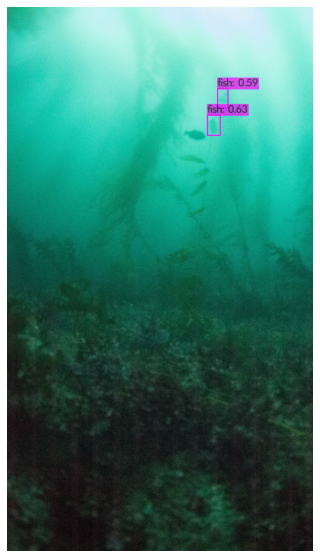

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-tiny.cfg /mydrive/YOLO/backup/yolov4-tiny_2700.weights $image -thresh 0.5
imShow('predictions.jpg')

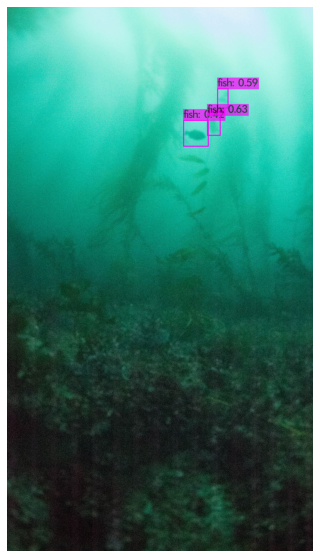

In [ ]:
imShow('predictions.jpg')

/content/darknet
 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	                           ->  152 x 152 x 128 
   9 max                2x 2/ 2    152 x 152 x 128 ->   76 x  76 x 128 0.003 BF
  10 conv    128       3 x 3/ 1     7

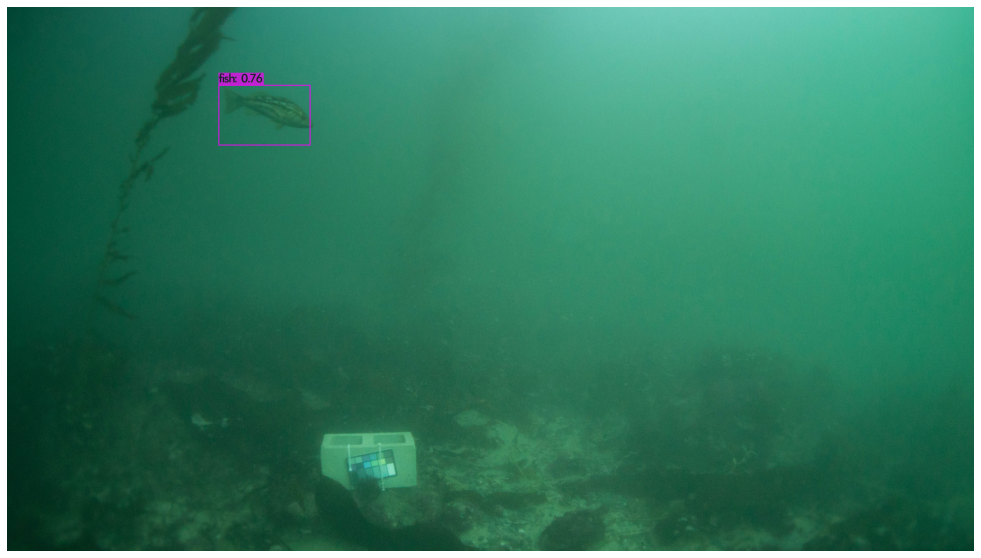

This image should have 1 fish


In [ ]:
detect_fish(14, fish, fish_counts)

/content/darknet
 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	                           ->  152 x 152 x 128 
   9 max                2x 2/ 2    152 x 152 x 128 ->   76 x  76 x 128 0.003 BF
  10 conv    128       3 x 3/ 1     7

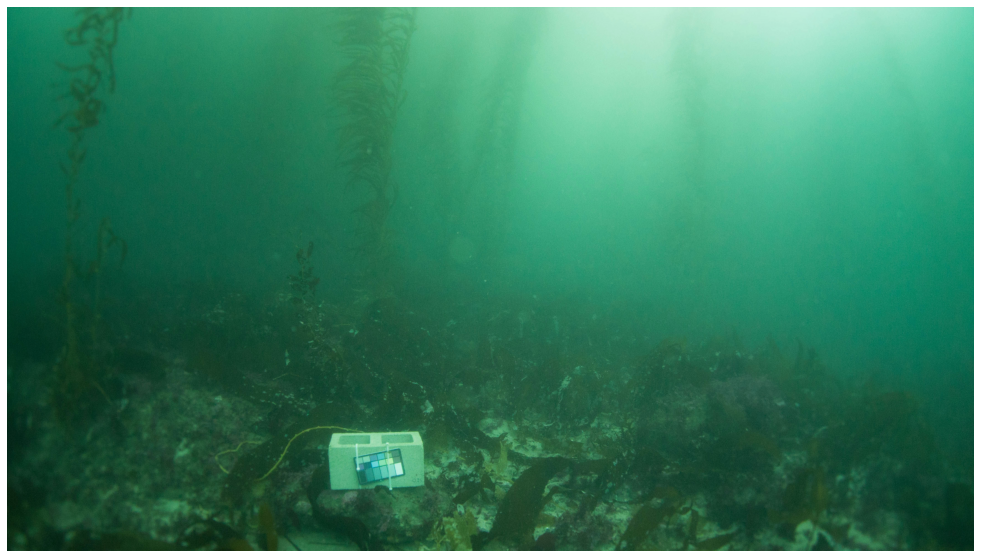

This image should have no fish


In [ ]:
detect_nofish(80, no_fish)

In [ ]:
from scipy.io import loadmat

In [ ]:
image

'/mydrive/Demo/170930_063715.jpg'

In [ ]:
mat = loadmat('/mydrive/Demo/170930_063749.mat')

In [ ]:
data = mat['DATA']

In [ ]:
len(data.dtype.names)

14

In [ ]:
imShow('/content/darknet/data/test/180714_170321.JPG')